In [1]:
import pandas as pd
import numpy as np

Fisrt, we import the data into Jupyter.

In [2]:
shop_data = pd.read_excel('C:/Users/vicki/Desktop/2019 Winter Data Science Intern Challenge Data Set.xlsx')
shop_data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


#### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

I want to see what is wrong with our order_amount. Something must be happening to cause the extremely large AOV.

In [4]:
shop_data.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

I can see from here that the mean value is consistent with our finding, that the AOV is 3145.13. But notice that the standard deviation is incrediably large here, it means that the mean value may not represent the data well. The median of the data is 284 and it is much smaller than the mean value. My initial guess is that there must be some outliers that are affecting the mean.

<AxesSubplot:>

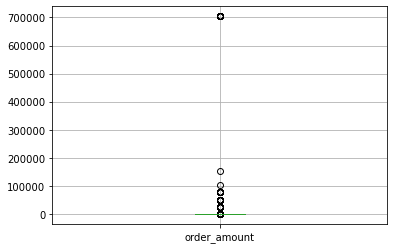

In [5]:
shop_data.boxplot(column="order_amount")

The boxplot indeed verifies my guess. There is an extreme value around 70,000 and some other outliers around 20,000 and 10,000. These are the things that are casuing the mean to be extremely large. Perhaps some institutions or companies are purchasing large amounts of shoes for their employee or participants. In order to better evaluate the data, I decide to temporarily remove those outliers. I used the 1.5xIQR rule here to identify outliers. So we will only include data within 1.5 times the IQR.

In [9]:
q1 = shop_data.order_amount.quantile(q=0.25)
q2 = shop_data.order_amount.quantile(q=0.5)
q3 = shop_data.order_amount.quantile(q=0.75)
iqr = q3-q1

In [12]:
new_data = shop_data[(shop_data.order_amount < q2 + iqr * 1.5) & (shop_data.order_amount > q2 - iqr * 1.5)]
new_data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


In [13]:
new_data.order_amount.describe()

count    4738.000000
mean      283.814268
std       132.061996
min        90.000000
25%       161.000000
50%       272.000000
75%       362.000000
max       624.000000
Name: order_amount, dtype: float64

Now the mean value becomes 283.81 which seems much more reasonable.

#### b. What metric would you report for this dataset? 

I would report the median for this dataset because it is not affected by outliers.

#### c. What is its value?

The median is 284.